# Enem x Educação Básica
### Um estudo feito baseado nos microdados do INEP, com o objetivo de entender o quanto a infraestrutura de uma escola primária interfere no resultado do ENEM ao seu redor.
### Importações Iniciais, instale via pip install -r requirements.txt

In [1]:
import pandas as pd
import qgrid
import pyodbc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker
from datetime import datetime
import folium
from folium import plugins
from folium.plugins import HeatMap

%matplotlib inline

### Essa tabela foi calculada através de um processo de ETL que uniu os microdados do INEP referente a resultado do ENEM e infraestrutura de escolas.

In [2]:
df = pd.read_excel('tabelafonte.xlsx', sheet_name="Planilha1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24565 entries, 0 to 24564
Columns: 144 entries, CO_ESCOLA_EDUCACENSO to ID_PROPOSTA_PEDAG_ALTERNANCIA
dtypes: float64(75), int64(65), object(4)
memory usage: 27.0+ MB


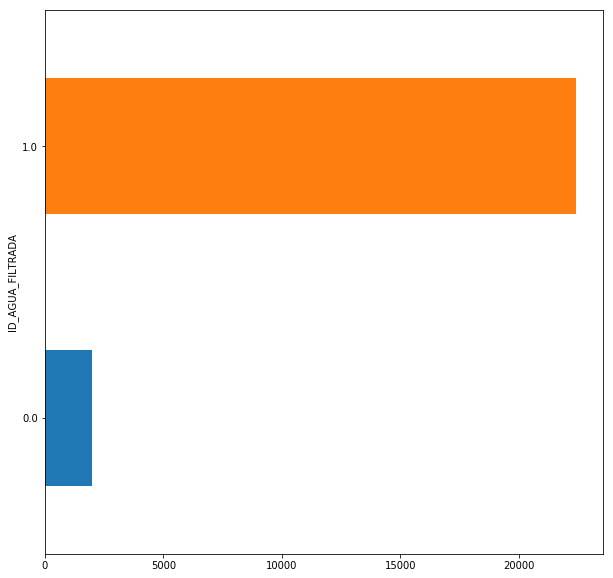

In [4]:
df.groupby('ID_AGUA_FILTRADA').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

### Comparando a média de notas em escolas com agua filtrada vs sem agua filtrada

In [5]:
df.query('ID_AGUA_FILTRADA == 1')['NU_NOTA_CN'].mean()

478.6976140068783

In [6]:
df.query('ID_AGUA_FILTRADA == 0')['NU_NOTA_CN'].mean()

462.97579848866496

In [7]:
df.query('ID_AGUA_FILTRADA == 0')['NU_NOTA_REDACAO'].mean()

440.3562162162162

In [8]:
df.query('ID_AGUA_FILTRADA == 1')['NU_NOTA_REDACAO'].mean().round()

477.0

### Função usada para preencher o rotulo dos dads em gráficos

In [9]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1.5),
                    textcoords="offset points",
                    ha='center', va='bottom')

In [10]:
#df.plot(x ='ID_AGUA_FILTRADA', y='NU_NOTA_REDACAO', kind = 'bar')

### Comparando as notas considerando a existência de agua filtrada

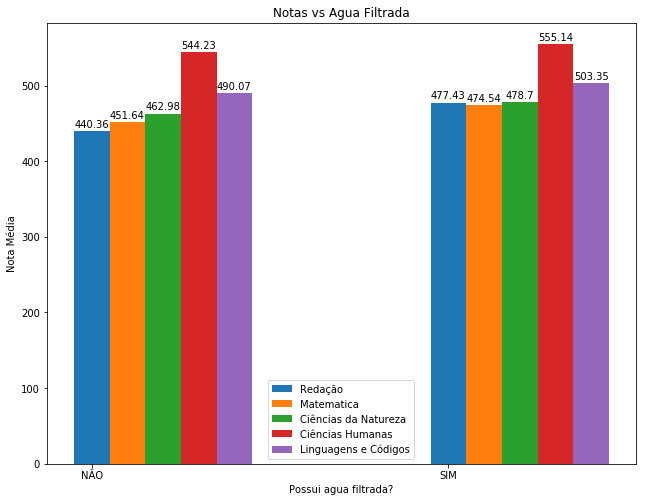

In [11]:
#Obter a medida agregada por categoria
redacao_ag = df.groupby('ID_AGUA_FILTRADA')['NU_NOTA_REDACAO'].mean().round(2)
mat_ag = df.groupby('ID_AGUA_FILTRADA')['NU_NOTA_MT'].mean().round(2)
cnatureza_ag = df.groupby('ID_AGUA_FILTRADA')['NU_NOTA_CN'].mean().round(2)
chumanas_ag = df.groupby('ID_AGUA_FILTRADA')['NU_NOTA_CH'].mean().round(2)
linguagens_ag = df.groupby('ID_AGUA_FILTRADA')['NU_NOTA_LC'].mean().round(2)

#Defino o intervalo
x=np.arange(len([1,2]))
#Defino a largura das barras
width=0.1

# Instancio e configuro o esqueleto do gráfico de barras
fig, ax = plt.subplots()
ax.set_ylabel('Nota Média')
ax.set_xlabel('Possui agua filtrada?')
ax.set_xticks(x)
ax.set_xticklabels(['NÃO', 'SIM'])
ax.set_title('Notas vs Agua Filtrada')

# Preencho com os dados, gerando uma barra para cada nota
rects1 = ax.bar(x+0*width, redacao_ag, width, label='Redação')
rects2 = ax.bar(x+1*width, mat_ag, width, label='Matematica')
rects3 = ax.bar(x+2*width, cnatureza_ag, width, label='Ciências da Natureza')
rects4 = ax.bar(x+3*width, chumanas_ag, width, label='Ciências Humanas')
rects5 = ax.bar(x+4*width, linguagens_ag, width, label='Linguagens e Códigos')

ax.legend() #so a legenda que não aparece

# Insiro os rotulos dos dados através da função autolabel
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# Mudo o layout de exibição e ploto o gráfico
fig.tight_layout(pad=-10)
plt.show()

### Comparando as notas considerando Laboratório de Informática

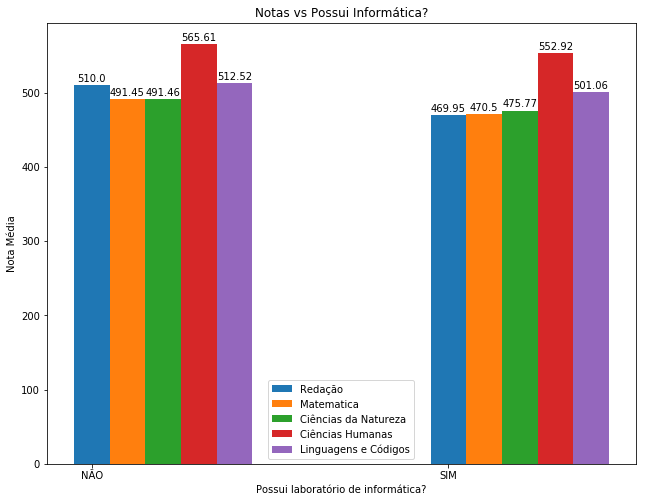

In [14]:
#Obter a medida agregada por categoria
redacao_ag = df.groupby('ID_LABORATORIO_INFORMATICA')['NU_NOTA_REDACAO'].mean().round(2)
mat_ag = df.groupby('ID_LABORATORIO_INFORMATICA')['NU_NOTA_MT'].mean().round(2)
cnatureza_ag = df.groupby('ID_LABORATORIO_INFORMATICA')['NU_NOTA_CN'].mean().round(2)
chumanas_ag = df.groupby('ID_LABORATORIO_INFORMATICA')['NU_NOTA_CH'].mean().round(2)
linguagens_ag = df.groupby('ID_LABORATORIO_INFORMATICA')['NU_NOTA_LC'].mean().round(2)

#Defino o intervalo
x=np.arange(len([1,2]))
#Defino a largura das barras
width=0.1

# Instancio e configuro o esqueleto do gráfico de barras
fig, ax = plt.subplots()
ax.set_ylabel('Nota Média')
ax.set_xlabel('Possui laboratório de informática?')
ax.set_xticks(x)
ax.set_xticklabels(['NÃO', 'SIM'])
ax.set_title('Notas vs Possui Informática?')

# Preencho com os dados, gerando uma barra para cada nota
rects1 = ax.bar(x+0*width, redacao_ag, width, label='Redação')
rects2 = ax.bar(x+1*width, mat_ag, width, label='Matematica')
rects3 = ax.bar(x+2*width, cnatureza_ag, width, label='Ciências da Natureza')
rects4 = ax.bar(x+3*width, chumanas_ag, width, label='Ciências Humanas')
rects5 = ax.bar(x+4*width, linguagens_ag, width, label='Linguagens e Códigos')

ax.legend() #so a legenda que não aparece

# Insiro os rotulos dos dados através da função autolabel
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# Mudo o layout de exibição e ploto o gráfico
fig.tight_layout(pad=-10)
plt.show()

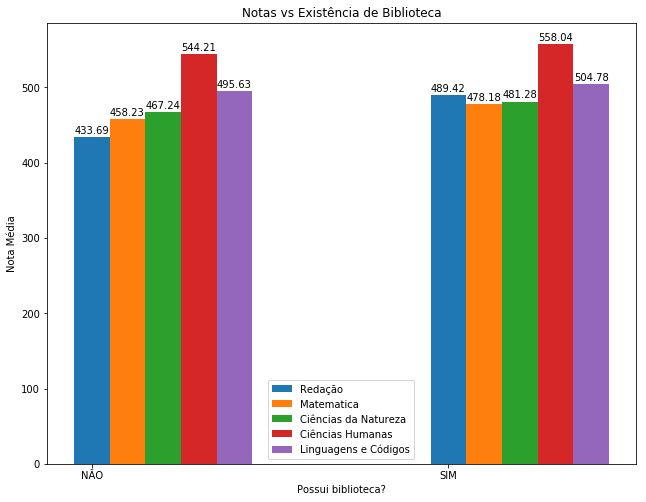

In [15]:
#Obter a medida agregada por categoria
redacao_ag = df.groupby('ID_BIBLIOTECA')['NU_NOTA_REDACAO'].mean().round(2)
mat_ag = df.groupby('ID_BIBLIOTECA')['NU_NOTA_MT'].mean().round(2)
cnatureza_ag = df.groupby('ID_BIBLIOTECA')['NU_NOTA_CN'].mean().round(2)
chumanas_ag = df.groupby('ID_BIBLIOTECA')['NU_NOTA_CH'].mean().round(2)
linguagens_ag = df.groupby('ID_BIBLIOTECA')['NU_NOTA_LC'].mean().round(2)

#Defino o intervalo
x=np.arange(len([1,2]))
#Defino a largura das barras
width=0.1

# Instancio e configuro o esqueleto do gráfico de barras
fig, ax = plt.subplots()
ax.set_ylabel('Nota Média')
ax.set_xlabel('Possui biblioteca?')
ax.set_xticks(x)
ax.set_xticklabels(['NÃO', 'SIM'])
ax.set_title('Notas vs Existência de Biblioteca')

# Preencho com os dados, gerando uma barra para cada nota
rects1 = ax.bar(x+0*width, redacao_ag, width, label='Redação')
rects2 = ax.bar(x+1*width, mat_ag, width, label='Matematica')
rects3 = ax.bar(x+2*width, cnatureza_ag, width, label='Ciências da Natureza')
rects4 = ax.bar(x+3*width, chumanas_ag, width, label='Ciências Humanas')
rects5 = ax.bar(x+4*width, linguagens_ag, width, label='Linguagens e Códigos')

ax.legend() #so a legenda que não aparece

# Insiro os rotulos dos dados através da função autolabel
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# Mudo o layout de exibição e ploto o gráfico
fig.tight_layout(pad=-10)
plt.show()

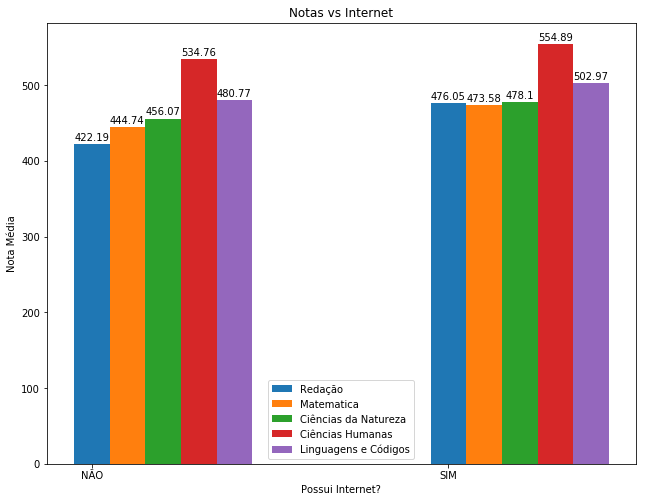

In [16]:
#Obter a medida agregada por categoria
redacao_ag = df.groupby('ID_INTERNET')['NU_NOTA_REDACAO'].mean().round(2)
mat_ag = df.groupby('ID_INTERNET')['NU_NOTA_MT'].mean().round(2)
cnatureza_ag = df.groupby('ID_INTERNET')['NU_NOTA_CN'].mean().round(2)
chumanas_ag = df.groupby('ID_INTERNET')['NU_NOTA_CH'].mean().round(2)
linguagens_ag = df.groupby('ID_INTERNET')['NU_NOTA_LC'].mean().round(2)

#Defino o intervalo
x=np.arange(len([1,2]))
#Defino a largura das barras
width=0.1

# Instancio e configuro o esqueleto do gráfico de barras
fig, ax = plt.subplots()
ax.set_ylabel('Nota Média')
ax.set_xlabel('Possui Internet?')
ax.set_xticks(x)
ax.set_xticklabels(['NÃO', 'SIM'])
ax.set_title('Notas vs Internet')

# Preencho com os dados, gerando uma barra para cada nota
rects1 = ax.bar(x+0*width, redacao_ag, width, label='Redação')
rects2 = ax.bar(x+1*width, mat_ag, width, label='Matematica')
rects3 = ax.bar(x+2*width, cnatureza_ag, width, label='Ciências da Natureza')
rects4 = ax.bar(x+3*width, chumanas_ag, width, label='Ciências Humanas')
rects5 = ax.bar(x+4*width, linguagens_ag, width, label='Linguagens e Códigos')

ax.legend() #so a legenda que não aparece

# Insiro os rotulos dos dados através da função autolabel
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# Mudo o layout de exibição e ploto o gráfico
fig.tight_layout(pad=-10)
plt.show()

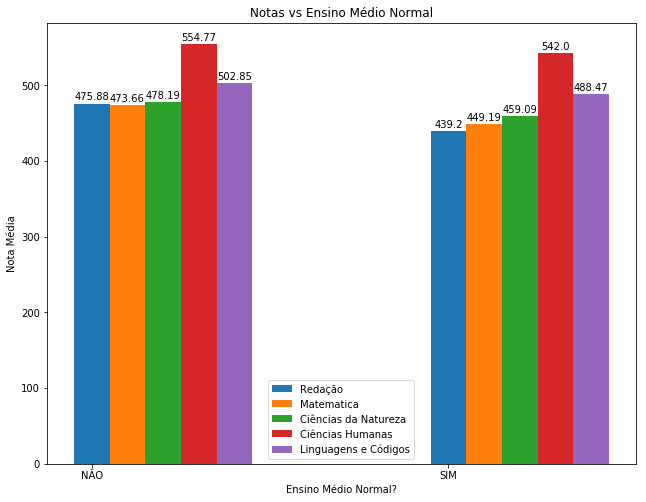

In [19]:
#Obter a medida agregada por categoria
redacao_ag = df.groupby('ID_REG_MEDIO_NORMAL')['NU_NOTA_REDACAO'].mean().round(2)
mat_ag = df.groupby('ID_REG_MEDIO_NORMAL')['NU_NOTA_MT'].mean().round(2)
cnatureza_ag = df.groupby('ID_REG_MEDIO_NORMAL')['NU_NOTA_CN'].mean().round(2)
chumanas_ag = df.groupby('ID_REG_MEDIO_NORMAL')['NU_NOTA_CH'].mean().round(2)
linguagens_ag = df.groupby('ID_REG_MEDIO_NORMAL')['NU_NOTA_LC'].mean().round(2)

#Defino o intervalo
x=np.arange(len([1,2]))
#Defino a largura das barras
width=0.1

# Instancio e configuro o esqueleto do gráfico de barras
fig, ax = plt.subplots()
ax.set_ylabel('Nota Média')
ax.set_xlabel('Ensino Médio Normal?')
ax.set_xticks(x)
ax.set_xticklabels(['NÃO', 'SIM'])
ax.set_title('Notas vs Ensino Médio Normal')

# Preencho com os dados, gerando uma barra para cada nota
rects1 = ax.bar(x+0*width, redacao_ag, width, label='Redação')
rects2 = ax.bar(x+1*width, mat_ag, width, label='Matematica')
rects3 = ax.bar(x+2*width, cnatureza_ag, width, label='Ciências da Natureza')
rects4 = ax.bar(x+3*width, chumanas_ag, width, label='Ciências Humanas')
rects5 = ax.bar(x+4*width, linguagens_ag, width, label='Linguagens e Códigos')

ax.legend() #so a legenda que não aparece

# Insiro os rotulos dos dados através da função autolabel
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# Mudo o layout de exibição e ploto o gráfico
fig.tight_layout(pad=-10)
plt.show()

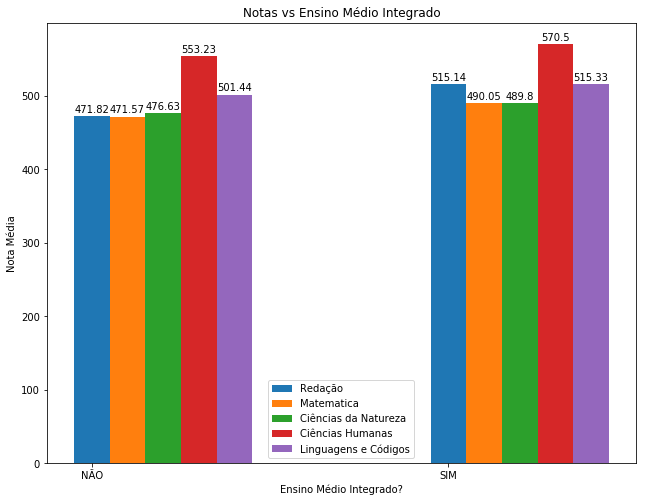

In [20]:
#Obter a medida agregada por categoria
redacao_ag = df.groupby('ID_REG_MEDIO_INTEGRADO')['NU_NOTA_REDACAO'].mean().round(2)
mat_ag = df.groupby('ID_REG_MEDIO_INTEGRADO')['NU_NOTA_MT'].mean().round(2)
cnatureza_ag = df.groupby('ID_REG_MEDIO_INTEGRADO')['NU_NOTA_CN'].mean().round(2)
chumanas_ag = df.groupby('ID_REG_MEDIO_INTEGRADO')['NU_NOTA_CH'].mean().round(2)
linguagens_ag = df.groupby('ID_REG_MEDIO_INTEGRADO')['NU_NOTA_LC'].mean().round(2)

#Defino o intervalo
x=np.arange(len([1,2]))
#Defino a largura das barras
width=0.1

# Instancio e configuro o esqueleto do gráfico de barras
fig, ax = plt.subplots()
ax.set_ylabel('Nota Média')
ax.set_xlabel('Ensino Médio Integrado?')
ax.set_xticks(x)
ax.set_xticklabels(['NÃO', 'SIM'])
ax.set_title('Notas vs Ensino Médio Integrado')

# Preencho com os dados, gerando uma barra para cada nota
rects1 = ax.bar(x+0*width, redacao_ag, width, label='Redação')
rects2 = ax.bar(x+1*width, mat_ag, width, label='Matematica')
rects3 = ax.bar(x+2*width, cnatureza_ag, width, label='Ciências da Natureza')
rects4 = ax.bar(x+3*width, chumanas_ag, width, label='Ciências Humanas')
rects5 = ax.bar(x+4*width, linguagens_ag, width, label='Linguagens e Códigos')

ax.legend() #so a legenda que não aparece

# Insiro os rotulos dos dados através da função autolabel
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# Mudo o layout de exibição e ploto o gráfico
fig.tight_layout(pad=-10)
plt.show()